In [1]:
import numpy as np
import torch
import matplotlib.pyplot  as plt
from unet import *
%load_ext autoreload
%autoreload 2

In [2]:
model = UNet(3,1,False)

The layers, size of kernel, stride, padding and architecture are based on the paper *Satellite Image Segmentation for Building Detection using U-Net*

In [3]:
print(model)

UNet(
  (inc): inconv(
    (conv): double_conv(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
  )
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): double_conv(
        (conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2

The intput has 3 color chanels in index 1, and dimensions 572x572 pixels.

The output has 1 color chanel because we are labeling a pixel in index 1, and same dimension as input.

In [4]:
x = torch.randn(1, 3, 572, 572)
y = model(x)
print(y.shape,x.shape)

torch.Size([1, 1, 572, 572]) torch.Size([1, 3, 572, 572])


It looks like white noise, because it is :)

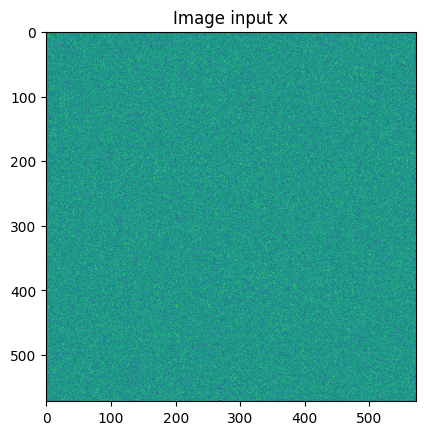

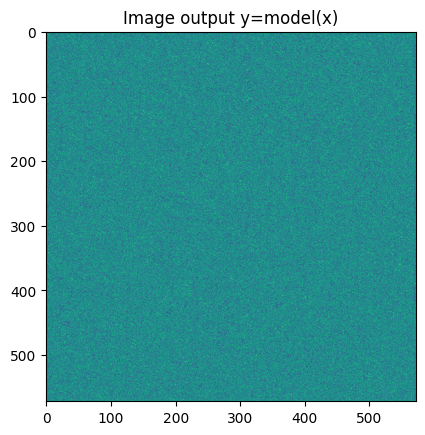

In [5]:
x = x.detach().numpy()[0,0,:]
plt.imshow(x)
plt.title("Image input x")
plt.show()
y = y.detach().numpy()[0,0,:]
plt.imshow(y)
plt.title("Image output y=model(x)")
plt.show()